In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
curated = pd.read_csv("dataset/ath_167/ath_167_Wang_2018.bed", sep="\t", header=0)

In [3]:
curated.head()

,acc,start,end,name,score,strand,motif
0,AT1G01320.1,920,955,TPR,0,+,TAGAYSLLAVVLYHTGDFNQATIYQQKALDINERE
1,AT1G01320.1,962,997,TPR,0,+,TMKSYGDLAVFYYRLQHTELALKYVKRALYLLHLT
2,AT1G01320.1,1004,1039,TPR,0,+,TAATYINVAMMEEGLGNVHVALRYLHKALKCNQRL
3,AT1G01970.1,163,198,P,0,+,NARDYTKIIHYYGKLNQVEDAERTLLSMKNRGFLI
4,AT1G01970.1,198,233,P,0,+,DQVTLTAMVQLYSKAGCHKLAEETFNEIKLLGEPL


In [4]:
Cheng = pd.read_csv("dataset/ath_167/ath_167_ppr_cheng.bed", sep="\t", header=None)
Cheng.columns = ['acc', 'start', 'end', 'name', 'score', 'strand', 'motif']

In [5]:
Cheng.head()

,acc,start,end,name,score,strand,motif
0,AT1G06140.1,2,37,L1,12.5,+,PVNRARALLTILSQAKTLNHTQQVHAKVIIHGFED
1,AT1G06140.1,37,72,S1,9.2,+,EVVLGSSLTNAYIQSNRLDFATSSFNRIPCWKRNR
2,AT1G06140.1,70,105,P1,12.1,+,NRHSWNTILSGYSKSKTCCYSDVLLLYNRMRRHCD
3,AT1G06140.1,107,142,L1,30.7,+,DSFNLVFAIKACVGLGLLENGILIHGLAMKNGLDK
4,AT1G06140.1,142,177,S1,35.3,+,DDYVAPSLVEMYAQLGTMESAQKVFDEIPVRNSVL


In [6]:
t1 = curated.merge(Cheng, 
                   left_on=['acc', 'start', 'end', "strand", "motif"], 
                   right_on=['acc', 'start', 'end', "strand", "motif"], 
                   how='outer')

In [7]:
t1.head()

,acc,start,end,name_x,score_x,strand,motif,name_y,score_y
0,AT1G01320.1,920,955,TPR,0.0,+,TAGAYSLLAVVLYHTGDFNQATIYQQKALDINERE,NaN,NaN
1,AT1G01320.1,962,997,TPR,0.0,+,TMKSYGDLAVFYYRLQHTELALKYVKRALYLLHLT,NaN,NaN
2,AT1G01320.1,1004,1039,TPR,0.0,+,TAATYINVAMMEEGLGNVHVALRYLHKALKCNQRL,NaN,NaN
3,AT1G01970.1,163,198,P,0.0,+,NARDYTKIIHYYGKLNQVEDAERTLLSMKNRGFLI,P,21.8
4,AT1G01970.1,198,233,P,0.0,+,DQVTLTAMVQLYSKAGCHKLAEETFNEIKLLGEPL,P,14.6


In [8]:
Pred = pd.read_csv("dataset/ath_167/Pred.tsv", sep="\t", header=None)
Pred.columns = ['acc', 'start', 'end', 'name', "score", 'strand', 'motif']
t2 = t1.merge(Pred,
              left_on=['acc', 'start', 'end', "strand", "motif"], 
              right_on=['acc', 'start', 'end', "strand", "motif"],
              how='outer')
t2.to_csv("dataset/ath_167/Merged.tsv", sep="\t", index=False)

In [ ]:
### Take only ATdGddddd.1 and change empty name to "B" mannully.

In [9]:
Merged = pd.read_csv("dataset/ath_167/Merged1.tsv", sep="\t", header=0)

In [10]:
Merged.head()

,acc,start,end,name_curated,score,strand,motif,name_Cheng,name_Pred
0,AT1G01320.1,920,955,TPR,1.000000,+,TAGAYSLLAVVLYHTGDFNQATIYQQKALDINERE,B,TPR
1,AT1G01320.1,962,997,TPR,1.000000,+,TMKSYGDLAVFYYRLQHTELALKYVKRALYLLHLT,B,TPR
2,AT1G01320.1,1004,1039,TPR,1.000000,+,TAATYINVAMMEEGLGNVHVALRYLHKALKCNQRL,B,TPR
3,AT1G01740.1,373,408,B,0.996137,+,EAINSKKKGDIAFRRKDFSEAIEFYTQFLDLGMIS,B,TPR
4,AT1G01970.1,163,198,P,1.000000,+,NARDYTKIIHYYGKLNQVEDAERTLLSMKNRGFLI,P,P


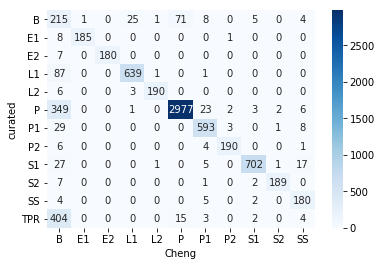

In [11]:
cmatrix = pd.crosstab(Merged.name_curated, Merged.name_Cheng, rownames=["curated"], colnames=["Cheng"])
sns.heatmap(cmatrix, annot=True, fmt='', cmap=plt.cm.Blues)

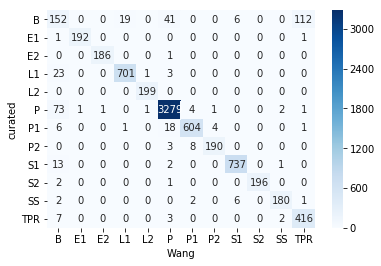

In [12]:
cmatrix = pd.crosstab(Merged.name_curated, Merged.name_Pred, rownames=["curated"], colnames=["Wang"])
sns.heatmap(cmatrix, annot=True, fmt='', cmap=plt.cm.Blues)

In [ ]:
with open("datasets/old/ath_167_fa/Athaliana_167_TAIR10_PPR.txt") as f:
    ath_PPRs = [line.rstrip() for line in f]

with open("datasets/Ath_167_33k_bg.bed", "w") as bg1:
    with open("datasets/Ath_167_33k_bg.tsv") as bg2:
        for line in bg2:
            acc = line.rstrip().split()[0]
            if acc not in ath_PPRs:
                bg1.write(line)

In [ ]:
with open("test_valid.tsv", "w") as tv:
    with open("datasets/Ath_167_33k_train.bed") as train:
        next(train)
        for line in train:
            line = line.rstrip().split("\t")
            name, motif = line[3], line[6]
            tv.write("{}\t{}\t{}\n".format(name, motif[:6], motif[6:]))

In [ ]:
with open("datasets/uniprot.bed", "w") as bed:
    with open("datasets_new/uniprot_ath_m.txt") as gff:
        for line in gff:
            line = line.rstrip()
            if line.startswith("##"):
                continue
            else:
                entry, source, typ, start, end, m1, m2, m3, note = line.split("\t")
            if typ == 'Chain':
                if re.search(Atg, note):
                    match = re.search(Atg, note)
                    acc = match.group()
                else:
                    acc = entry
            elif typ in ['Repeat', 'Region']:
                bed.write("{}\t{}\t{}\t{}\t{}\t{}\n".format(acc, int(start)-1, int(start)-1+35, "0", "+", note))
            else:
                continue

In [6]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
def encode_kmers(kmers, alphabet="ACDEFGHIKLMNPQRSTVWY", k=35):
    encoded_kmers = []
    for kmer in kmers:
        kmer = kmer[:k]    # Make sure to take expected length
        try:
            idx = [alphabet.index(aa) for aa in kmer]
            encoded_kmer = to_categorical(idx, len(alphabet))
            encoded_kmer = np.array(encoded_kmer.flatten(), dtype=np.int)
            encoded_kmers.append(encoded_kmer)
        except ValueError:  # in case of non_amino_acid letters
            pass
    return np.array(encoded_kmers)

In [48]:
with open("datasets/ps51375/ps51375_bs1_train.tsv", "w") as f:
    with open("datasets/ps51375/ps51375_bs1.tsv") as bs1:
        for line in bs1:
            acc, start, end, name, score, strand, motif = line.rstrip().split("\t")
            if "B" not in motif and "J" not in motif and "X" not in motif and "Z" not in motif :
                f.write(line)

In [43]:
with open("/Users/gongwei/Desktop/ath_PS50005_61_entry.fasta", "w") as f:
    with open("/Users/gongwei/Desktop/ath_PS50005_61.fasta") as ori:
        for line in ori:
            line = line.rstrip()
            if line.startswith(">"):
                entry = line.split("|")[1]
                f.write(">{}\n".format(entry))
            else:
                f.write("{}\n".format(line))

In [6]:
import re
ATG = r"(At.?g\d{5})"
with open("dataset/TPR2.txt", "a") as pid:
    with open("/Users/gongwei/Downloads/uniprot-ps50293-ath.tab") as tab:
        for line in tab:
            line = line.rstrip()
            if re.search(ATG, line):
                match = re.search(ATG, line)
                acc = match.group()
                pid.write("{}\n".format(acc))